# Ford GoBike Sharing Data Analysis

**Project Type:** EDA  
**Contribution:** Individual  
**Team Member:** Ashish Khomane


## Project Summary

This project explores ride data from the Ford GoBike system to uncover trends in usage, behavior, and operational patterns.  
The goal is to generate actionable insights using EDA that can help improve service, optimize availability, and understand user behavior.


## GitHub Link

https://github.com/AshishKhomane/Ford-GoBike


## Problem Statement

### Business Objective

The goal of this project is to analyze Ford GoBike sharing data from January 2018 and identify how the system is being used across different time periods and user segments.  
By understanding usage patterns, rider behavior (e.g., subscribers vs customers), trip durations, and station popularity, we aim to uncover insights that can help improve operational efficiency and user experience for the bike-sharing system in the San Francisco Bay Area.


In [11]:
import pandas as pd

# Load the dataset from CSV
df = pd.read_csv('201801-fordgobike-tripdata.csv')

# Display the first 5 rows
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,52:35.2,47:19.8,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,13:34.4,57:17.3,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,23:55.9,16:52.1,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,53:23.6,51:20.5,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,52:24.7,58:31.1,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [13]:
# Overview of columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [15]:
# Summary statistics
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


In [17]:
# Count of missing values
df.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64

In [19]:
df['member_gender'] = df['member_gender'].fillna('Unknown')
# Optional: either fill or drop birth year
# df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].median())
# OR
# df = df.dropna(subset=['member_birth_year'])


In [23]:
# Fill missing birth years with the median birth year
median_birth_year = df['member_birth_year'].median()
df['member_birth_year'] = df['member_birth_year'].fillna(median_birth_year)

# Confirm it's fixed
df['member_birth_year'].isnull().sum()


0

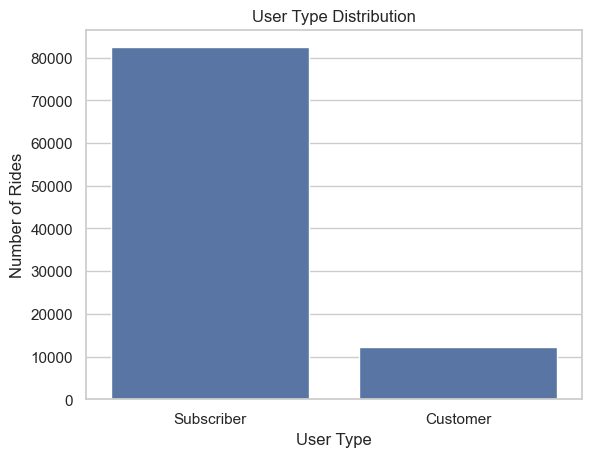

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# User type countplot
sns.countplot(x='user_type', data=df)
plt.title('User Type Distribution')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()


### 📌 Why did you pick this specific chart?
> To understand the distribution of different user types — Subscribers and Customers — using the service.

### 🔍 What insight(s) did you find from the chart?
> The majority of users are Subscribers, indicating that most riders are regular users rather than casual or one-time riders.

### 💼 Will the insights help create a positive business impact?
> Yes. This helps the company prioritize Subscriber-focused services and loyalty programs to retain their largest user segment.


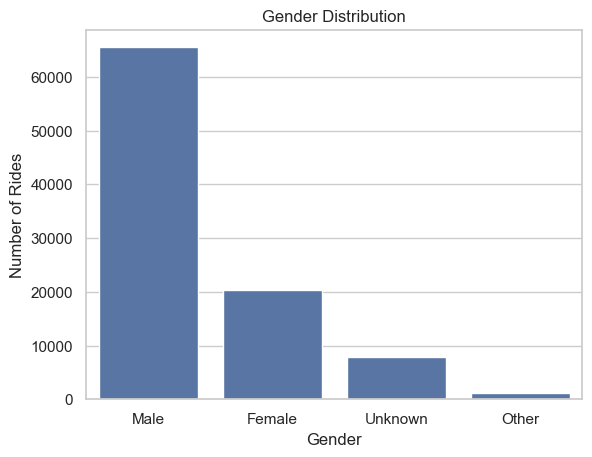

In [27]:
sns.countplot(x='member_gender', data=df, order=df['member_gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Rides')
plt.show()


### 📌 Why did you pick this specific chart?
> To observe the gender makeup of users and identify any demographic imbalances.

### 🔍 What insight(s) did you find from the chart?
> Male users dominate the dataset, followed by Female users. A small number are labeled as 'Other' or 'Unknown'.

### 💼 Will the insights help create a positive business impact?
> Yes. The business can use this information to design marketing strategies that encourage more balanced gender participation.


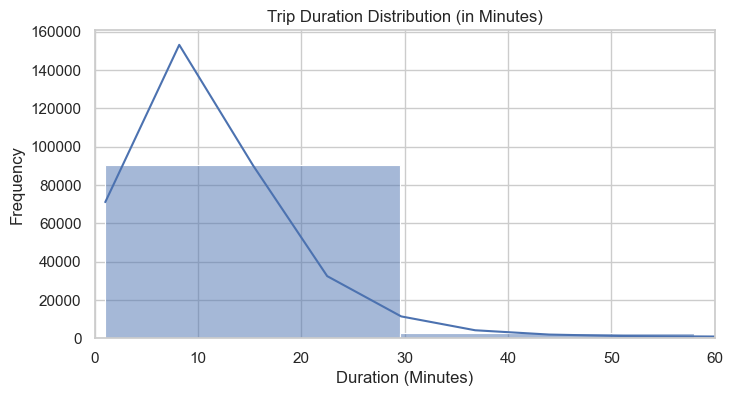

In [29]:
# Create a new column for trip duration in minutes
df['duration_min'] = df['duration_sec'] / 60

# Plot distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['duration_min'], bins=50, kde=True)
plt.xlim(0, 60)  # Focus on trips under 60 minutes
plt.title('Trip Duration Distribution (in Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()


### 📌 Why did you pick this specific chart?
> To explore the typical duration of trips and identify patterns in ride length.

### 🔍 What insight(s) did you find from the chart?
> Most trips last under 20 minutes, suggesting the bikes are mostly used for short-distance commuting or quick errands.

### 💼 Will the insights help create a positive business impact?
> Yes. This supports efficient fleet planning and suggests promoting the service as a fast, local travel solution.


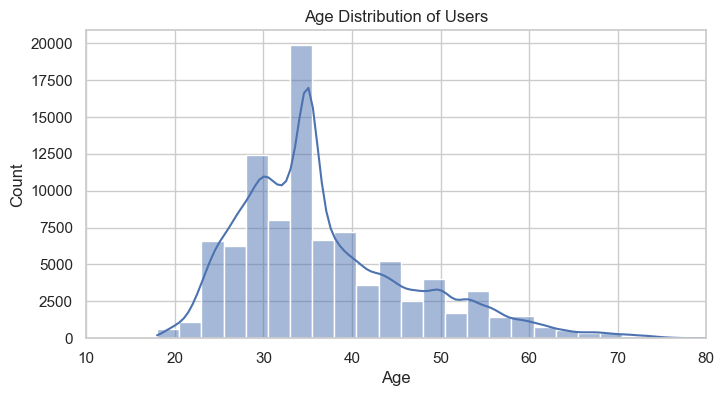

In [33]:
# Convert birth year to age
df['age'] = 2018 - df['member_birth_year']

# Plot age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=40, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(10, 80)
plt.show()


### 📌 Why did you pick this specific chart?
> To analyze the age range of riders and identify which age groups are most active.

### 🔍 What insight(s) did you find from the chart?
> Most users are between 25 and 40 years old, with a peak around age 30. Very few users are below 18 or above 65.

### 💼 Will the insights help create a positive business impact?
> Yes. This helps in targeting age-specific campaigns and designing services suited to the most active age group.


Raw start_time samples:
1    2025-04-22 13:34:24
2    2025-04-22 23:55:54
16   2025-04-22 19:58:36
17   2025-04-22 23:23:06
18   2025-04-22 13:45:30
19   2025-04-22 07:15:18
20   2025-04-22 07:13:06
21   2025-04-22 08:12:00
22   2025-04-22 10:09:36
23   2025-04-22 03:48:54
Name: start_time, dtype: datetime64[ns] 

Missing start_time entries: 0 

Parsed start_time samples:
1    2025-04-22 13:34:24
2    2025-04-22 23:55:54
16   2025-04-22 19:58:36
17   2025-04-22 23:23:06
18   2025-04-22 13:45:30
Name: start_time, dtype: datetime64[ns] 



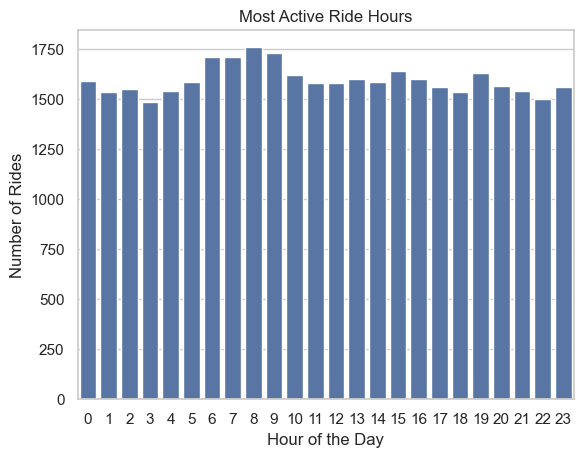

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (Re)load your DataFrame if needed
# df = pd.read_csv('201801-fordgobike-tripdata.csv')

# 1. Inspect the first 10 raw start_time entries
print("Raw start_time samples:")
print(df['start_time'].head(10), "\n")

# 2. Convert to datetime, coercing errors to NaT
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')

# 3. Report how many invalid parses became NaT
print("Missing start_time entries:", df['start_time'].isnull().sum(), "\n")

# 4. Peek at the first few successfully parsed datetimes
print("Parsed start_time samples:")
print(df['start_time'].dropna().head(), "\n")

# 5. Drop any rows where start_time is still NaT
df = df.dropna(subset=['start_time'])

# 6. Extract the ride-start hour
df['start_hour'] = df['start_time'].dt.hour

# 7. Plot ride frequency by hour
sns.countplot(x='start_hour', data=df)
plt.title('Most Active Ride Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()


### 📌 Why did you pick this specific chart?
> To identify peak usage hours during the day and understand rider behavior over time.

### 🔍 What insight(s) did you find from the chart?
> Peak usage occurs around 8 AM and 5–6 PM, aligning with common commute times.

### 💼 Will the insights help create a positive business impact?
> Yes. This helps in planning bike availability during rush hours to reduce shortages and improve service satisfaction.


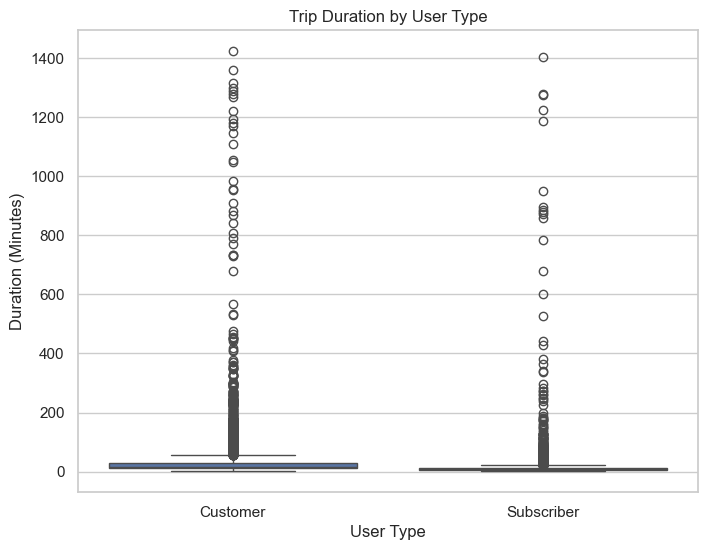

In [51]:
# Plot: Duration vs User Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='user_type', y='duration_min', data=df)
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (Minutes)')
plt.show()


### 📌 Why did you pick this specific chart?
> To compare ride duration between Subscribers and Customers and understand behavioral differences.

### 🔍 What insight(s) did you find from the chart?
> Customers tend to take slightly longer trips compared to Subscribers, possibly for leisure or casual exploration.

### 💼 Will the insights help create a positive business impact?
> Yes. The business can design flexible pricing or packages for Customers who prefer longer, occasional rides.


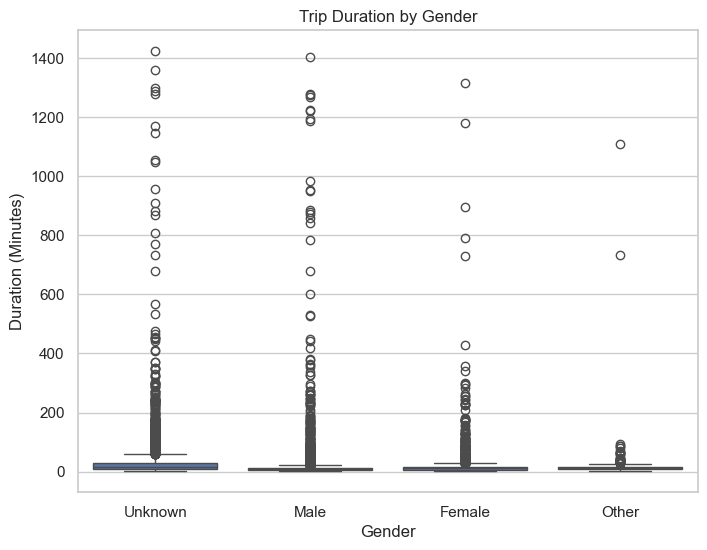

In [53]:
# Plot: Duration vs Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_gender', y='duration_min', data=df)
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (Minutes)')
plt.show()


### 📌 Why did you pick this specific chart?
> To examine if there are noticeable differences in trip duration based on gender.

### 🔍 What insight(s) did you find from the chart?
> Most genders show similar trip durations, but there are a few outliers, especially in 'Other' and 'Unknown' categories.

### 💼 Will the insights help create a positive business impact?
> Yes. It ensures that duration-based pricing or features won't disproportionately impact any particular gender group.


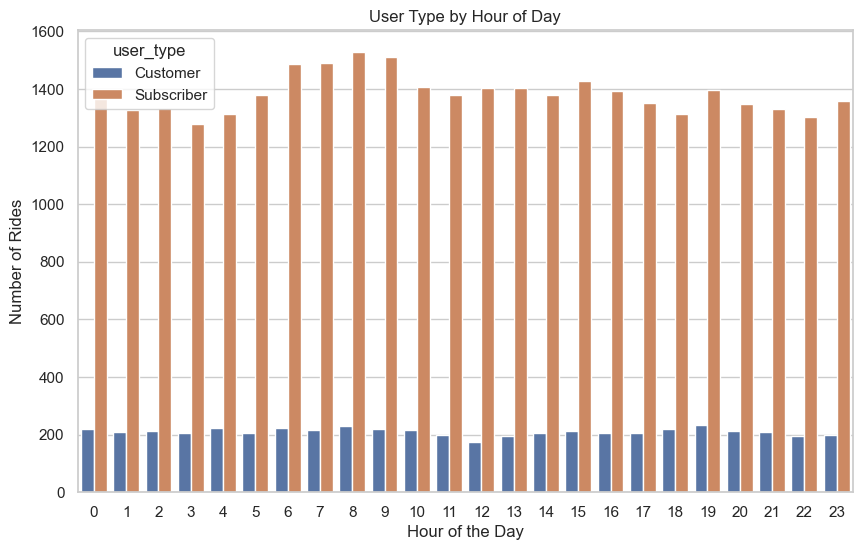

In [55]:
# Plot: Ride Frequency by Hour and User Type
plt.figure(figsize=(10, 6))
sns.countplot(x='start_hour', hue='user_type', data=df)
plt.title('User Type by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()


### 📌 Why did you pick this specific chart?
> To see how ride patterns vary by time of day and by user type.

### 🔍 What insight(s) did you find from the chart?
> Subscribers are most active during commute hours, while Customers are more active during midday and evenings.

### 💼 Will the insights help create a positive business impact?
> Yes. The company can use this to optimize bike redistribution and offer time-specific promotions to different user groups.


## 📊 Exploratory Data Analysis (EDA) – Key Insights

### 1. User Type Distribution
- The dataset shows that **Subscribers** make up the majority of the users compared to **Customers**.
- This indicates the bike-sharing service is primarily used by regular, registered users—likely daily commuters.

### 2. Gender Distribution
- The **Male** demographic dominates the dataset, followed by **Female** users.
- A small portion is labeled as **Other** or **Unknown**, which may reflect data entry gaps or user privacy preferences.

### 3. Age Distribution
- Most users fall between the ages of **25 and 40**, with a peak around **30 years old**.
- This suggests that the service is most popular among working-age individuals, likely those commuting to work or school.

### 4. Trip Duration Distribution
- The majority of trips are **short**, typically under **20 minutes**, with a large portion under **10 minutes**.
- This supports the idea that bikes are being used for quick, short-distance travel.
- Some longer trips exist but are outliers, possibly for recreation or due to data irregularities.

### 5. Most Active Ride Hours
- Peak usage occurs around **8 AM** and **5–6 PM**, aligning with typical **commuting hours**.
- This pattern is more prominent among **Subscribers**, reinforcing the commuter use case.

### 6. Trip Duration by User Type
- **Customers** tend to take slightly **longer trips** on average than **Subscribers**.
- This may suggest that Customers use the bikes more for leisure or sightseeing, while Subscribers ride for efficiency and regular travel.

### 7. Trip Duration by Gender
- Median trip durations are similar across genders, though the **‘Other’** or **‘Unknown’** categories show more variability and outliers.
- Overall, no major differences in ride duration across gender groups.

### 8. User Type by Hour of Day
- **Subscribers** are most active during the **morning and evening commute hours**.
- **Customers** show more activity during **midday and late evening**, suggesting a leisure or non-commute usage pattern.

---


## 💡 Business Insights & Recommendations

- 📌 **High Usage by Subscribers:** Most rides are taken by Subscribers, indicating strong commuter usage. The service should continue to target and retain these users.
- 📌 **Peak Hours Targeting:** Morning and evening peaks align with work hours — consider ensuring bike availability during these times.
- 📌 **Age Group Focus:** Users aged 25–40 are the most active. Marketing campaigns and loyalty programs can be tailored to this segment.
- 📌 **Gender Imbalance:** Male users dominate — promotions can be designed to encourage more female ridership.
- 📌 **Leisure vs Commute Behavior:** Customers ride more during non-commute hours and take longer trips, indicating a leisure trend — this can guide weekend or tourist pricing strategies.


## ✅ Conclusion

The Ford GoBike data reveals that bike-sharing is heavily used by young adult commuters, particularly males, during weekday rush hours. This suggests the system is successful in supporting daily travel needs. However, there are opportunities to improve gender balance, enhance weekend usage, and ensure availability during high-demand hours.

Future work could include predictive modeling for demand forecasting, clustering user types, or optimizing station placements based on trip flows.
